# CS 457 - Homework Assignment 13: NLP
## Ali Hashir - ah05433 - ah05433@st.habib.edu.pk 

In [1]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')
from nltk import pos_tag, word_tokenize, RegexpParser

import spacy

from spacy import displacy

from collections import Counter
import en_core_web_sm
from bs4 import BeautifulSoup
import requests
import re
import numpy

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ali_h\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ali_h\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ali_h\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
nlp = spacy.load('en_core_web_sm')

In [3]:
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html.parser')
    for script in soup(["script", "style", 'aside']):
        script.extract()
        return " ".join(re.split(r'[\n\t]+', soup.get_text()))

In [4]:
url = "https://www.theguardian.com/world/2013/jun/09/edward-snowden-nsa-whistleblower-surveillance"
article = url_to_string(url)
article = nlp(article)
len(article.ents)

170

In [5]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'PERSON': 23,
         'ORG': 58,
         'DATE': 28,
         'NORP': 4,
         'LOC': 2,
         'CARDINAL': 5,
         'GPE': 35,
         'ORDINAL': 8,
         'MONEY': 1,
         'TIME': 3,
         'LAW': 1,
         'EVENT': 1,
         'QUANTITY': 1})

<font size=3>
There are 58 organizations (OTG) <br>
23 Persons (PERSON) <br>
4 Nationalities (NORP) <br>
28 Dates (DATE) <br>
35 Countries (GPE)

and other....
</font>

In [6]:
items = [x.text for x in article.ents]
Counter(items).most_common(3)

[('NSA', 16), ('CIA', 12), ('US', 11)]

<font size=3> 
Makes sense that NSA, CIA, and, US are the most common terms as the article is titled as edward-snowden-nsa-whistleblower-surveillance as edward snowden is a person who leaked highly classified information from the National Security Agency (NSA) in the USA in 2013, when he was an employee and subcontractor.
</font>

In [26]:
sentences = [x for x in article.sents]
print(sentences[0])

 Edward Snowden: the whistleblower behind the NSA surveillance revelations | The NSA files |


In [27]:
displacy.render(nlp(str(sentences[0])), jupyter=True, style='ent')

In [28]:
dict([(str(x), x.label_) for x in nlp(str(sentences[0])).ents])

{'Edward Snowden': 'PERSON', 'NSA': 'ORG'}

In [29]:
[(x.orth_,x.pos_, x.lemma_) for x in [y for y in nlp(str(sentences[0])) if not y.is_stop and y.pos_ != 'PUNCT']]

[(' ', 'SPACE', ' '),
 ('Edward', 'PROPN', 'Edward'),
 ('Snowden', 'PROPN', 'Snowden'),
 ('whistleblower', 'NOUN', 'whistleblower'),
 ('NSA', 'PROPN', 'NSA'),
 ('surveillance', 'NOUN', 'surveillance'),
 ('revelations', 'NOUN', 'revelation'),
 ('|', 'NOUN', '|'),
 ('NSA', 'PROPN', 'NSA'),
 ('files', 'VERB', 'file'),
 ('|', 'NOUN', '|')]

In [30]:
displacy.render(nlp(str(sentences)), jupyter=True, style='ent')

Algorithm output seems pretty accurate. It is able to identify the entities and their types correctly. It is also able to identify the relations between the entities correctly. For example, it is able to identify that Edward Snowden is a person and he is the subject of the sentence. It is also able to identify that the NSA is an organization and it is the object of the sentence.

### Q2: Reading PDF

In [ ]:
from tika import parser

file = '2204.02768.pdf'
raw = parser.from_file(file)


In [254]:
tokenize_words = nltk.tokenize.word_tokenize(raw['content'])
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend([
    "T", "J", "D", "S", "M", "H", "et al", "et", "pp", "a.", "m.", "d.", "j.",
    "s.", "r.", "c.", "t.", "al.", "use", "used", "also", "P."
])
no_stopwords = [
    word for word in tokenize_words if word.lower() not in stopwords
]

# remove punctuation, count raw words
nonPunct = re.compile('.*[A-Za-z].*')
clean_words = [w for w in no_stopwords if nonPunct.match(w)]

filtered_word_freq = nltk.FreqDist(clean_words)

In [255]:
filtered_word_freq.most_common(20)

[('quantum', 188),
 ('computer', 125),
 ('future', 97),
 ('computers', 68),
 ('Alice', 66),
 ('Sycamore', 62),
 ('description', 61),
 ('physical', 59),
 ('free', 53),
 ('possible', 49),
 ('computational', 47),
 ('systems', 43),
 ('argument', 43),
 ('even', 43),
 ('theory', 39),
 ('past', 36),
 ('samples', 36),
 ('claim', 33),
 ('system', 33),
 ('time', 32)]

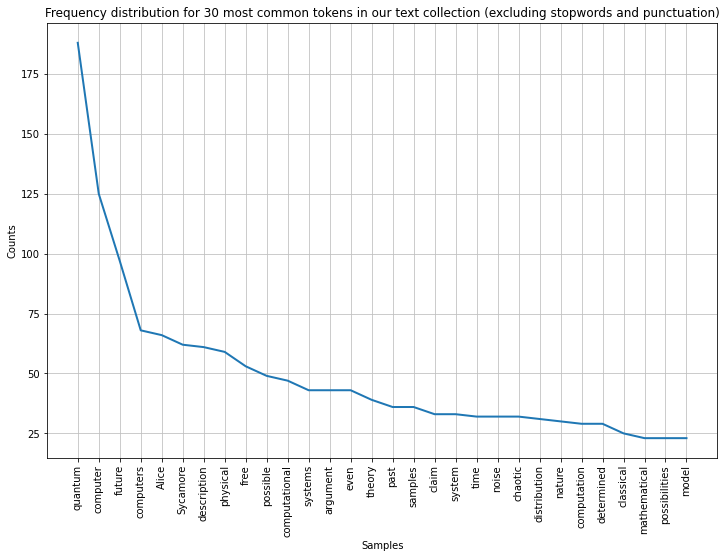

<AxesSubplot:title={'center':'Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)'}, xlabel='Samples', ylabel='Counts'>

In [256]:
filtered_word_freq.plot(
    30,
    title=
    'Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)'
)


In [258]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 8]

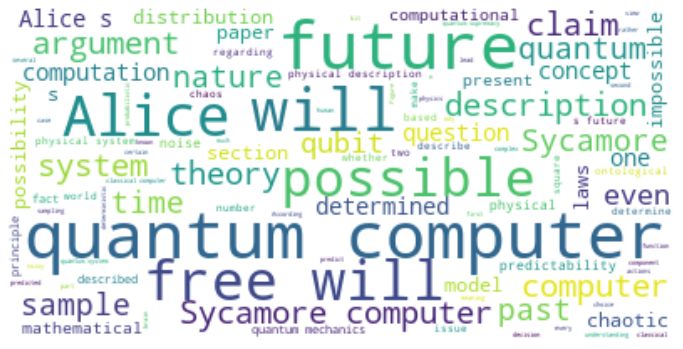

In [259]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(raw['content'])
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<font size=3>
The above visualizations show that the most significant keywords in the research paper are quantum computing, free will, Sycamore, computer, Alice, possible, chatoic, computation, and, many more. But we get the general idea of the research paper such that it is talking about quantum computers and free will. I do not see any error in the algorithm in the output, however, we may perform some more nlp techniques like lemmatization to not have repeated words (for example system and systems). The keyword analysis also tells us that the research paper is focusing on two main entities 'Sycamore' and 'Alice' and is talking about quantum computation.
</font>

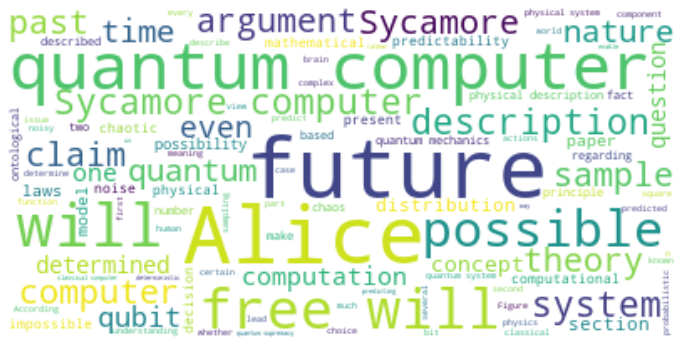

In [261]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["T", "J", "D", "S", "M", "H", "et al", "et", "al"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,
                      max_font_size=50,
                      max_words=100,
                      background_color="white").generate(raw['content'])

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [260]:
from rake_nltk import Rake

r = Rake()
r.extract_keywords_from_text(raw['content'])
r.get_ranked_phrases_with_scores()[:10]

[(46.5, 'hebrew essay ון חופשי "" מחשבים קוונטיים'),
 (36.78333333333334, 'הכל צפוי והרשות נתונה 14 15 see'),
 (33.67287414965986, 'degree fourier – walsh functions remain substantial'),
 (30.143057093051365, 'et al ., “ quantum supremacy using'),
 (28.55757575757576, 'coherence ”, chapter 3 pf ph'),
 (28.258490566037736, 'hebrew ), bar ilan university press'),
 (28.08013640238704, 'et al ., “ transmon platform'),
 (27.483321009563245, '“ strong church – turing thesis ”'),
 (27.0625, 'natural chaotic phenomena thus combine ingredients'),
 (26.940748901252235,
  'systems cannot demonstrate significant quantum computational advantage')]


<font size=3>
we can see the keyword phrases ranked highest to lowest with scores. 
</font>

In [20]:
nlp = spacy.load('en_core_web_sm')
doc2 = nlp(raw['content'])
print(doc2.ents)

(1, Quantum Computers, Predictability, Free Will 

, Gil Kalai, quantum, quantum, quantum, quantum, three, first, quantum 

, quantum physics, quantum 

, hundreds, quantum, second, third, 2, one, two, first, second, quantum computers, several decades, quantum physics, quantum physics, Schrödinger 1936, quantum physics, Hodgson, Aaronson 2016, 1, quantum physics, Briegel, 2012, Aharonov, Cohen, Shushi, 2016, Aaronson, 2016, 3, Section 2, Section 3, Section 4, Kalai, 2019, 2021, Sycamore, quantum computer, 12, Alice, Section 5, Sections, 6, 7, Section 9, Section 10, 1, 4, 2, one, two, zero, two, Two, two, Boolean, close to the 1940s, Church, Turing, the second half, twentieth century, the 1960s, 1970s, 2n, 100, recent decades, 2, NP, 5, Pitowsky, 1990, Pitowsky, Church–Turing, quantum computers, two, zero, Boolean, zero, 1, zeros, quantum, 3, Quantum Computers, quantum, first, the 1980s, quantum computers, two, Sycamore, two, four, 1, One, two, two, 6, 1, 0, a2 + b2 and, 1, One, two, tw

In [21]:
import yake

In [263]:
kw_extractor = yake.KeywordExtractor()
language = "en"
max_ngram_size = 3
deduplication_threshold = 0.9
numOfKeywords = 20
custom_kw_extractor = yake.KeywordExtractor(lan=language,
                                            n=max_ngram_size,
                                            dedupLim=deduplication_threshold,
                                            top=numOfKeywords,
                                            features=None)
keywords = custom_kw_extractor.extract_keywords(raw['content'])

keywords = sorted(keywords, key=lambda x: x[1], reverse=False)
for kw in keywords:
    print(kw)

('Sycamore Computer', 0.00021901793801441)
('Quantum Computers', 0.00024471951777370755)
('Sycamore quantum computer', 0.00037673707251108636)
('Quantum', 0.000524392713779705)
('computer', 0.0008605486809983376)
('Alice', 0.0014666810548163885)
('Computers', 0.0014686697489038297)
('Sycamore', 0.0015233579928739332)
('quantum computer model', 0.0017093125410823468)
('future', 0.0018674541317156223)
('quantum systems', 0.0019465292829532353)
('quantum computer samples', 0.002317712939831723)
('Sycamore quantum', 0.002513804483314199)
('complex quantum systems', 0.0029990158561995386)
('quantum mechanics', 0.0030443660551837956)
('intermediate-scale quantum computers', 0.003365134595523288)
('noisy quantum computers', 0.0034394742562390145)
('quantum computer makes', 0.003637375074171692)
('NISQ computers', 0.0038616031395753594)
('Free', 0.003898818602485538)


<font size=3>
Sycamore, Quantum, Alice, future, NISQ, free, quantum mechanics, and, future seem to be the most important keywords which makes sense according to the research paper. However, further lemmatization may further improve results. 
</font>

# Q3 Sentiment Analysis

In [20]:
import tweepy as tw
import json
import pandas as pd
import numpy as np
from textblob import TextBlob

In [24]:
total_positive = 0
total_negative = 0

with open('text.txt', 'r',encoding="utf8") as file:
    for line in file:
        #  Perform Sentiment Analysis on the tweet and show total positive and negative sentiment counts.
        analysis = TextBlob(line)
        print(analysis.sentiment)
        if analysis.sentiment.polarity > 0:
            total_positive += 1
        elif analysis.sentiment.polarity < 0:
            total_negative += 1

print("-------------------")
print("Total Positive Sentiment: " + str(total_positive))
print("Total Negative Sentiment: " + str(total_negative))

Sentiment(polarity=0.25, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.175, subjectivity=0.6416666666666666)
Sentiment(polarity=-0.8, subjectivity=0.9)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.033333333333333326, subjectivity=0.4333333333333333)
Sentiment(polarity=-0.25, subjectivity=0.5)
Sentiment(polarity=0.26666666666666666, subjectivity=0.5750000000000001)
Sentiment(polarity=-0.2, subjectivity=0.0)
-------------------
Total Positive Sentiment: 2
Total Negative Sentiment: 5


In [25]:
# Display one positive and one negative sentiment
with open('text.txt', 'r',encoding="utf8") as file:
    for line in file:
        analysis = TextBlob(line)
        if analysis.sentiment.polarity > 0:
            print("Positive: " + line)
            break
    for line in file:
        analysis = TextBlob(line)
        if analysis.sentiment.polarity < 0:
            print("Negative: " + line)
            break



Positive: In case anyone requires food- these are crowd sourced restaurants that are open. hopefully everyone is safe and well.

Negative: Eating chicken republic food for the first time 😁



The sentiment analysis seems to be accurate in this case. The result "Positive: In case anyone requires food- these are crowd sourced restaurants that are open. hopefully everyone is safe and well." has a positive sentiment as it expresses concern for others and well wishes. 

The result "Negative: Eating chicken republic food for the first time 😁" has a negative sentiment. Although the presence of the emoji might suggest a positive sentiment, the sentiment analysis is able to capture the negative sentiment because the phrase "for the first time" implies uncertainty or dissatisfaction with the experience.